<a href="https://colab.research.google.com/github/ritamgh/DLT-lab/blob/main/Week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
print("Unique labels:", np.unique(y_train))

Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)
Unique labels: [0 1 2 3 4 5 6 7 8 9]


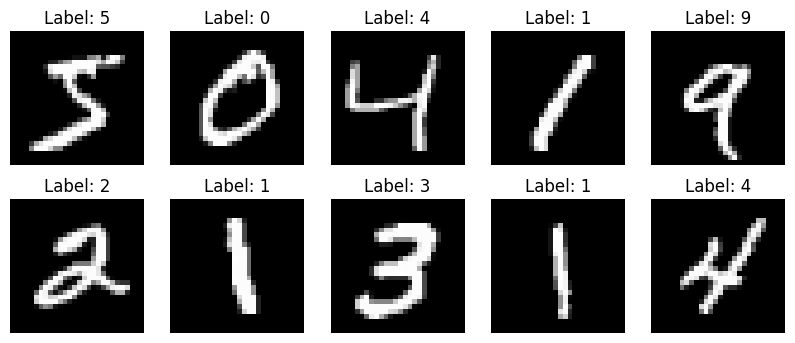

In [ ]:
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

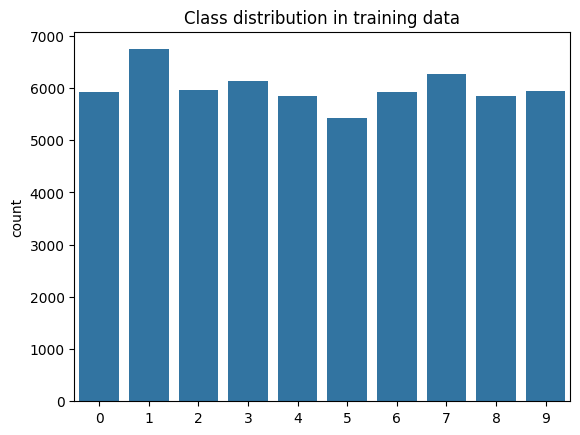

In [ ]:
sns.countplot(x=y_train)
plt.title("Class distribution in training data")
plt.show()

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

In [ ]:

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [ ]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),  # hidden layer
    Dense(10, activation='softmax')                     # output layer
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train_cat, epochs=10, batch_size=128,
                    validation_split=0.1, verbose=2)

Epoch 1/10
422/422 - 2s - 5ms/step - accuracy: 0.8956 - loss: 0.3779 - val_accuracy: 0.9548 - val_loss: 0.1676
Epoch 2/10
422/422 - 2s - 5ms/step - accuracy: 0.9497 - loss: 0.1773 - val_accuracy: 0.9633 - val_loss: 0.1269
Epoch 3/10
422/422 - 1s - 3ms/step - accuracy: 0.9626 - loss: 0.1301 - val_accuracy: 0.9690 - val_loss: 0.1107
Epoch 4/10
422/422 - 1s - 3ms/step - accuracy: 0.9711 - loss: 0.1018 - val_accuracy: 0.9695 - val_loss: 0.0977
Epoch 5/10
422/422 - 1s - 3ms/step - accuracy: 0.9764 - loss: 0.0822 - val_accuracy: 0.9715 - val_loss: 0.0909
Epoch 6/10
422/422 - 2s - 4ms/step - accuracy: 0.9804 - loss: 0.0674 - val_accuracy: 0.9758 - val_loss: 0.0825
Epoch 7/10
422/422 - 3s - 6ms/step - accuracy: 0.9838 - loss: 0.0569 - val_accuracy: 0.9772 - val_loss: 0.0802
Epoch 8/10
422/422 - 2s - 5ms/step - accuracy: 0.9866 - loss: 0.0476 - val_accuracy: 0.9765 - val_loss: 0.0768
Epoch 9/10
422/422 - 1s - 3ms/step - accuracy: 0.9890 - loss: 0.0407 - val_accuracy: 0.9792 - val_loss: 0.0728
E

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print("Test Accuracy:", test_acc)

Test Accuracy: 0.975600004196167


In [ ]:
print("Test Loss:", test_loss)

Test Loss: 0.07842466980218887


Text(0.5, 1.0, 'Loss Curve')

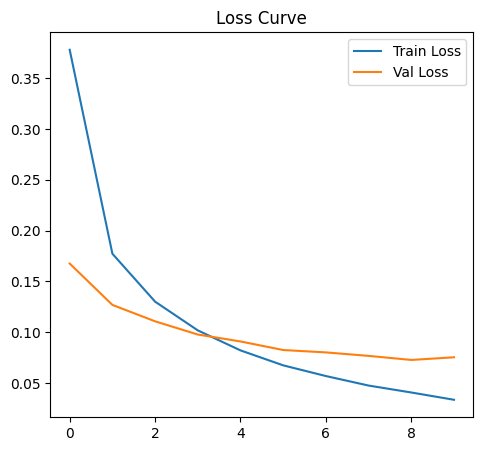

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss Curve")

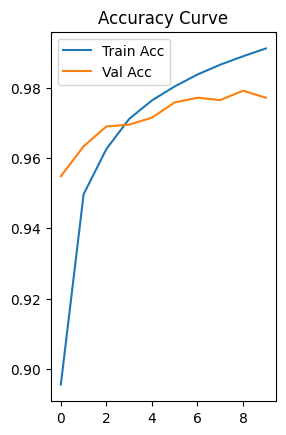

In [ ]:
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Accuracy Curve")
plt.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step


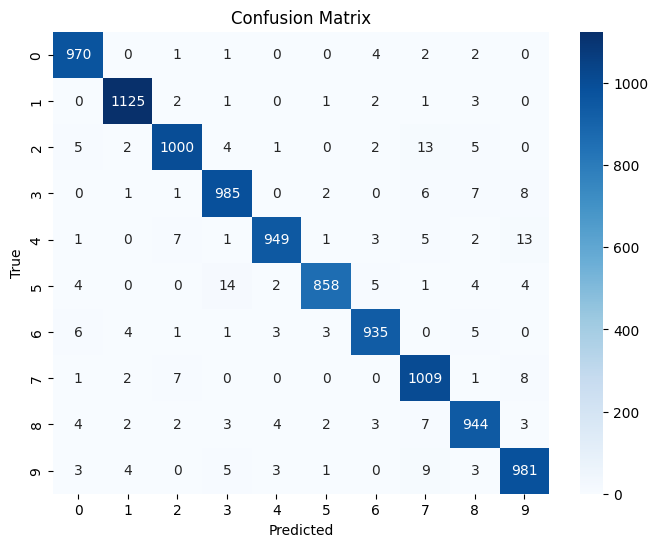

In [ ]:

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.99      0.97      0.98       982
           5       0.99      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.96      0.98      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.96      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

